# Plots
just pareto fronts for n = 50 and n = 150. only sn vs sn. Potentially full plot + zoom in.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
RES_DIR = "/Users/louis.kuemmerle/Promotion/projects/G1/results/spapros_smk_res_bm"
EVAL_BATCH = "eval_batch_bm_1"
SELECT_BATCH = ["batch_bm_1.1","batch_bm_1.3"]

In [15]:
df_eval = pd.read_csv(Path(RES_DIR, "evaluation_overview.csv"),index_col=0)
df_data = pd.read_csv(Path(RES_DIR, "data_parameters.csv"),index_col=0)
df_sele = pd.read_csv(Path(RES_DIR, "selection_overview.csv"),index_col=0).set_index("selection_name")

In [16]:
pd.crosstab(df_eval["eval_data_id"], df_eval["eval_dataset"])

eval_dataset,2019Hodge_sn_human_brain_MTG_min20perct,HLCA-raw_subsampled,Litvinukova2020_w_cts,Madissoon2019_w_cts,bone_marrow-raw,immune-raw_subsampled,kolabas_mouse_bone_marrow_subsampled,krasnow-raw,liver-raw,merfish_MTG_no_vessels,pbmc1k-raw,primary_motor_cortex_mmus-raw_subsampled,tabula_muris_senis-raw_subsampled,thymus-raw_subsampled
eval_data_id,,,,,,,,,,,,,,
40,0,0,2120,0,0,0,0,0,0,0,0,0,0,0
41,0,0,0,2120,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,320,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,320
93,0,0,0,0,0,0,0,0,0,0,0,0,320,0
94,0,0,0,0,0,0,320,0,0,0,0,0,0,0
95,0,320,0,0,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,320,0,0,0
127,0,0,0,0,320,0,0,0,0,0,0,0,0,0


In [17]:
DATASETS = ['Litvinukova2020_w_cts', 'Madissoon2019_w_cts']

In [18]:
# Prepare plot df

# Mapping from data_id to dataset
id_to_dataset = {}
for i in df_eval.loc[df_eval["eval_batch"] == EVAL_BATCH, "eval_data_id"].unique():
    dataset = df_data.loc[i,"dataset"]
    if dataset in DATASETS:
        id_to_dataset[i] = df_data.loc[i,"dataset"]
    
# Get data_id for eval_batch6.1 (evaluation on brain snRNA-seq)
#dataset = id_to_dataset[data_id]

# Load metrics
dfs = []
for data_id, dataset in id_to_dataset.items():
    summary_file = Path(RES_DIR, f"evaluation/{dataset}_{data_id}_summary.csv")
    df_ = pd.read_csv(summary_file, index_col=0)
    df_["dataset"] = dataset
    dfs.append(df_)
df = pd.concat(dfs)

# Subset to selections of batch6.1 and add selection info to df (selections on bootstrap samples of brain snRNA-seq)
#df_selections = df_sele.loc[df_sele["batch"] == SELECT_BATCH].copy()
df_selections = df_sele.loc[df_sele["batch"].isin(SELECT_BATCH)].copy()
df = df.loc[df_selections.index]
df["method"] = df_selections["method"]
df["n"] = df_selections["n"]


# Calculate aggreate scores
df["ct score"] = (df['forest_clfs accuracy'] + df['forest_clfs perct acc > 0.8']) / 2
df["var score"] = (
    df['knn_overlap mean_overlap_AUC'] +
    df['cluster_similarity nmi_5_20'] +
    + df['cluster_similarity nmi_21_60']
) / 3
df["score"] = (df["ct score"] + df["var score"]) / 2


In [19]:
from matplotlib import colors
from matplotlib import rcParams

# scatter plot
markers = {
    'spapros': 'D',   # Diamond
    'spaproscto': 's',   # Square
    'genebasis': 'd', # Thin diamond
    'scmer': '^',   # Triangle up
    'selfe': 'v',   # Triangle down
    'pca': 'o',   # Circle
    'scpnmf': 'P',   # Plus
    'persistus': 'X', # Cross
    'persist': 'X', # Cross
    'nsforest': '<',   # Triangle left
    'DE': 'o',   # Circle
    'scgenefit': '*',   # Star
    'smash': '>',   # Triangle right
    'cosg': 'p',   # Pentagon
    'triku': 'H',   # Hexagon
}

#"#e6194b", "#3cb44b", "#4363d8", "#f58231"

colors = {
    'spapros'    : "#3cb44b",#'green',
    'spaproscto' : "#3cb44b",#'green',
    'genebasis'  : "#4363d8",#'blue',
    'scmer'      : "#4363d8",#'blue',
    'selfe'      : "#4363d8",#'blue',
    'pca'        : "#4363d8",#'blue',
    'scpnmf'     : "#4363d8",#'blue',
    'persistus'  : "#4363d8",#'blue',
    'persist'    : "#e6194b",#'red',
    'nsforest'   : "#e6194b",#'red',
    'DE'         : "#e6194b",#'red',
    'scgenefit'  : "#e6194b",#'red',
    'smash'      : "#f58231",#'orange',
    'cosg'       : "#f58231",#'orange',
    'triku'      : "#f58231",#'orange',
}



metric_to_label = {
    'score': 'score',
    'var score': 'variation recovery score',
    'cluster_similarity nmi_5_20': 'coarse clustering similarity',
    'cluster_similarity nmi_21_60': 'fine clustering similarity',
    'knn_overlap mean_overlap_AUC': 'neighborhood similarity',
    'ct score': 'cell type classif. score',
    'forest_clfs accuracy': 'cell type classif. acc.',
    'forest_clfs perct acc > 0.8': 'perct. of captured cell types',
    'moranI': "spatial variation (Moran's I)",
    'moranI ct max': 'within cell type spatial variation',
    # 'moranI ct mean'                :'',
}

metric_to_label_n = {
    'score': 'score',
    'var score': 'variation\nrecovery score',
    'cluster_similarity nmi_5_20': 'coarse clustering\nsimilarity',
    'cluster_similarity nmi_21_60': 'fine clustering\nsimilarity',
    'knn_overlap mean_overlap_AUC': 'neighborhood\nsimilarity',
    'ct score': 'cell type\nclassif. score',
    'forest_clfs accuracy': 'cell type\nclassif. acc.',
    'forest_clfs perct acc > 0.8': 'perct. of captured\ncell types',
    'moranI': "spatial variation\n(Moran's I)",
    'moranI ct max': 'within cell type\nspatial variation',
    # 'moranI ct mean'                :'',
}

metric_to_color = {
    'score': 'black',
    'var score': '#228B22',  # 'green',
    'cluster_similarity nmi_5_20': '#228B22',  # 'green',
    'cluster_similarity nmi_21_60': '#228B22',  # 'green',
    'knn_overlap mean_overlap_AUC': '#228B22',  # 'green',
    'ct score': '#663399',  # 'purple',
    'forest_clfs accuracy': '#663399',  # 'purple',
    'forest_clfs perct acc > 0.8': '#663399',  # 'purple',
    'moranI': '#FF9933',  # 'orange',
    'moranI ct max': '#FF9933',  # 'orange',
}


plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
SMALL_SIZE = 9  # 17
MEDIUM_SIZE = 11  # 19
BIGGER_SIZE = 13  # 21
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [20]:
def pareto_front(df, col1="metric1", col2="metric2"):
    """Add pareto front to df as boolean column (df will be sorted by col1)
    """
    df = df.sort_values(by=col1, ascending=False)

    pareto_points = []
    current_best_metric2 = -float('inf')

    for index, row in df.iterrows():
        if row[col2] > current_best_metric2:
            pareto_points.append(True)
            current_best_metric2 = row[col2]
        else:
            pareto_points.append(False)

    df['pareto_front'] = pareto_points
    return df

def plot_pareto_front(
        df, col1="metric1", col2="metric2", pareto_color="purple", figsize=(5,3.5), msize=20, xmin=None, ymin=None,
        save=False
    ):
    """"""

    S = msize
    marker_to_size = {
        'D' : S * 0.7, # Diamond
        's' : S * 0.9, # Square
        '^' : S, # Triangle up
        'v' : S, # Triangle down
        '<' : S, # Triangle left
        '>' : S, # Triangle right
        'd' : S * 1.2, # Thin diamond
        'p' : S, # Pentagon
        '*' : S * 1.2, # Star
        'H' : S * 0.9, # Hexagon
        'P' : S * 1.4, # Plus
        'X' : S, # Cross
        'o' : S*0.8, # Circle
    }


    # Plot
    filt = df["pareto_front"]

    plt.figure(figsize=figsize)
    
    for method in list(colors.keys())[::-1]:
        df_ = df.loc[(df["method"] == method) & (~filt)]
        plt.scatter(
            df_.loc[:,col1], df_.loc[:,col2],
            color=colors[method],
            marker=markers[method],
            label=method,
            edgecolor="lightgray",
            linewidth=0.2,
            s=marker_to_size[markers[method]], #s=msize
        )
        # color of method edgecolor = pareto_color
        df_ = df.loc[(df["method"] == method) & (filt)]
        plt.scatter(
            df_.loc[:,col1], df_.loc[:,col2],
            color=colors[method],
            marker=markers[method],
            edgecolor=pareto_color,
            label=method,
            s=marker_to_size[markers[method]]*1.5, #msize*1.5,
            linewidth=1,
            zorder=1000
        )
    
    df = df.loc[df["pareto_front"]].sort_values(col1)
    if len(df) > 1:
        plt.plot(df[col1].values,df[col2].values,color=pareto_color)
    
    plt.xlabel(metric_to_label[col1])
    plt.ylabel(metric_to_label[col2])
    
    # Set legend: method name and marker with color, one extra generic marker with pareto_color
    handles = []
    labels = []
    for method in list(colors.keys()):
        handles.append(plt.Line2D((0,1),(0,0), color=colors[method], marker=markers[method], linestyle=''))
        labels.append(method)
    handles = [plt.Line2D((0,1),(0,0), color=pareto_color, marker='x', linestyle='-')] + handles
    labels = ["Pareto front"] + labels
    # Position legend outside of plot aligned to bottom right
    plt.legend(handles, labels, bbox_to_anchor=(1.02, 0), loc='lower left', borderaxespad=0., frameon=False)
    
    
    ax = plt.gca()
    if xmin is not None:
        ax.set_xlim(xmin=xmin)
    if ymin is not None:
        ax.set_ylim(ymin=ymin)
    
    ylims = ax.get_ylim()
    xlims = ax.get_xlim()
    
    # Add horizontal line at y=y_max and vertical line at x=x_max
    y_max = df[col2].max()
    x_of_y_max = df.loc[df[col2] == y_max, col1].values[0]
    x_max = df[col1].max()
    y_of_x_max = df.loc[df[col1] == x_max, col2].values[0]
    plt.plot([xlims[0], x_of_y_max], [y_max, y_max], color=pareto_color)
    plt.plot([x_max, x_max], [ylims[0], y_of_x_max], color=pareto_color)
    
    # Set limits back to original
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    
    if save:
        plt.savefig(save, bbox_inches="tight", transparent=True)
    
    plt.show()



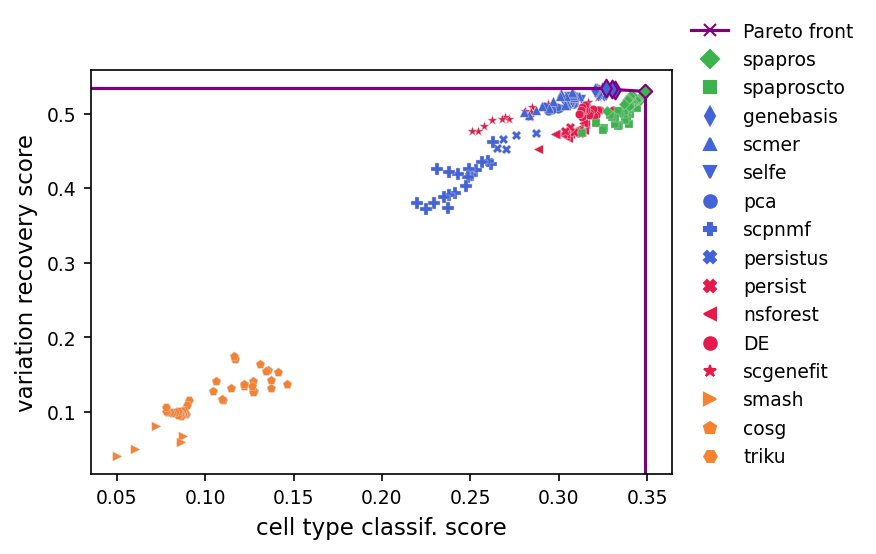

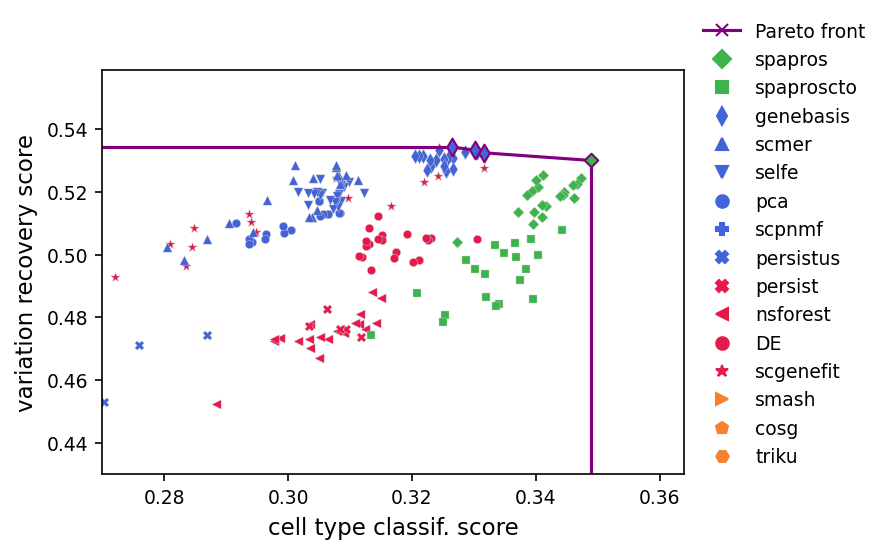

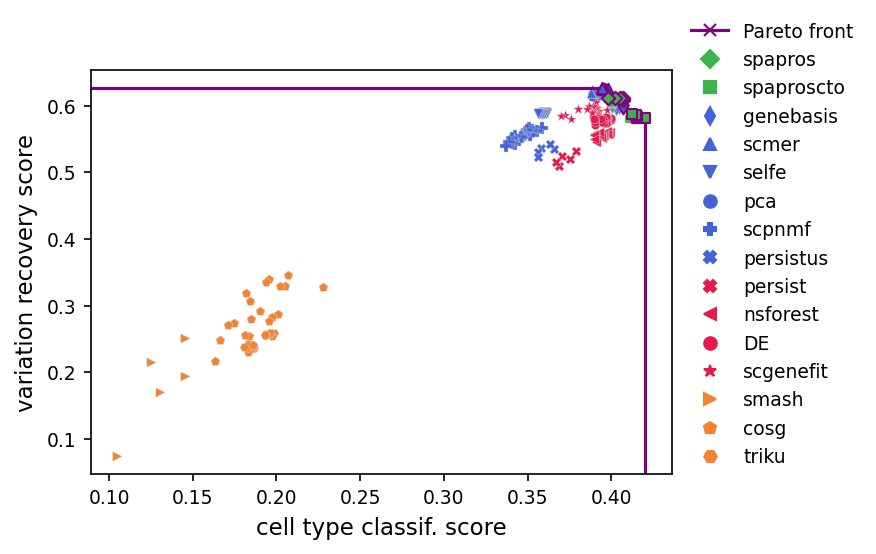

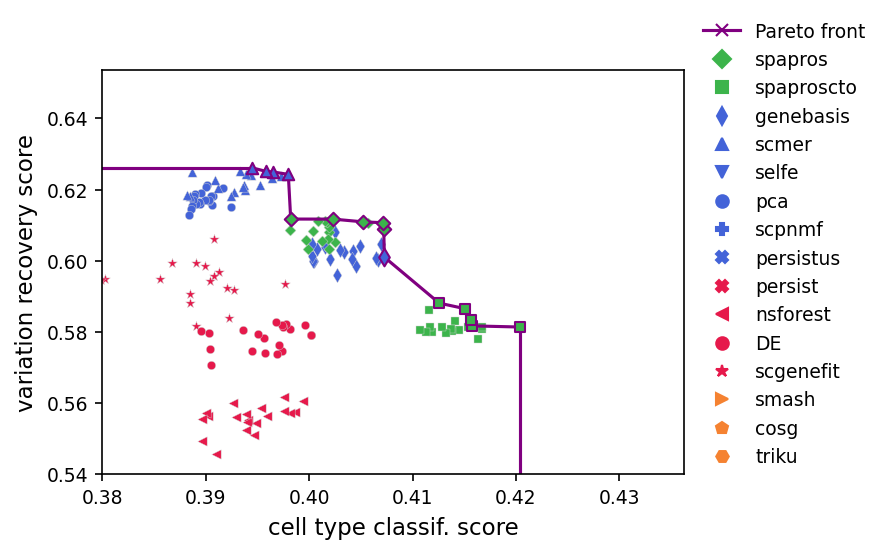

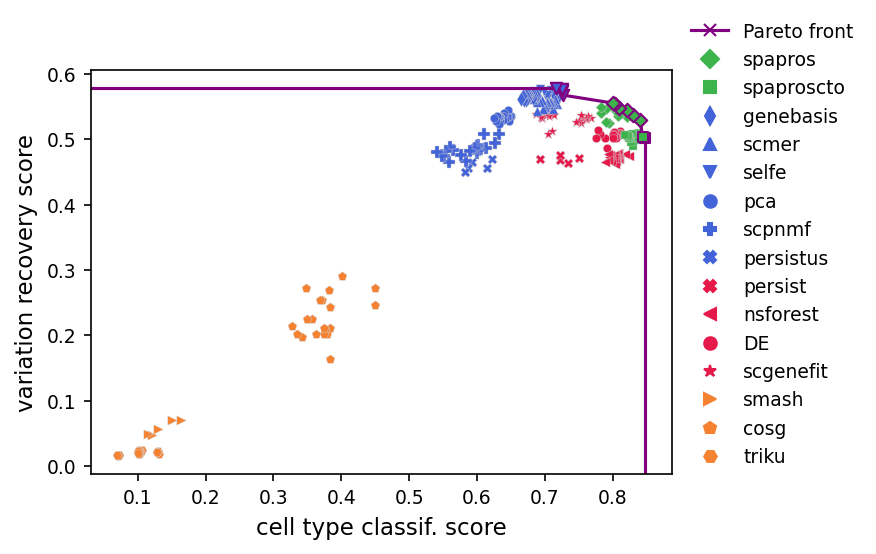

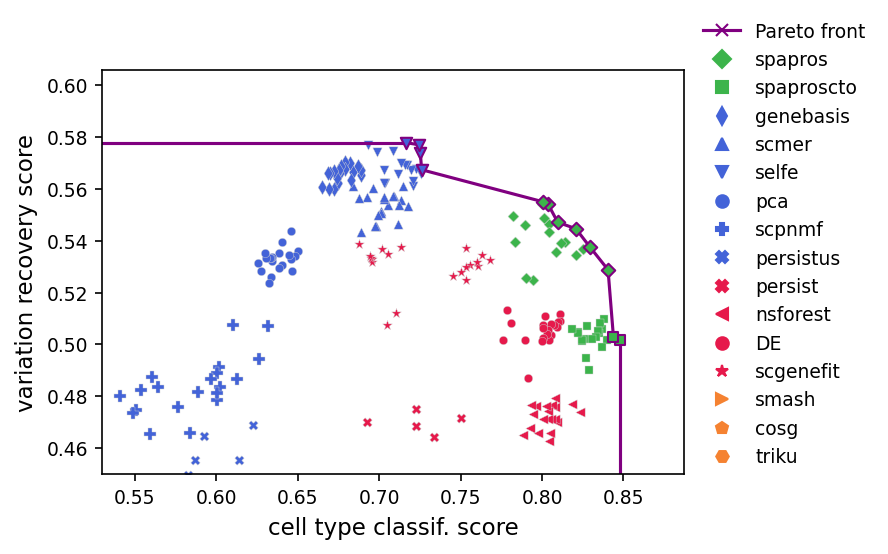

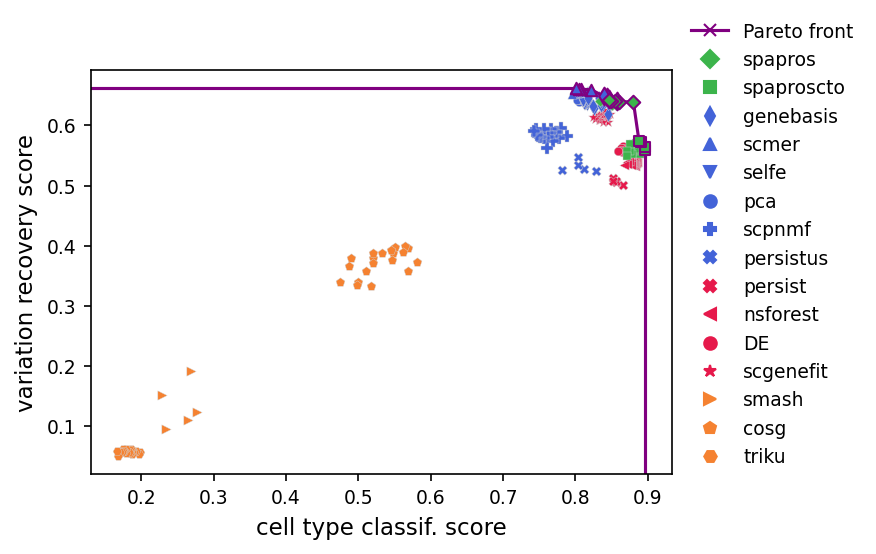

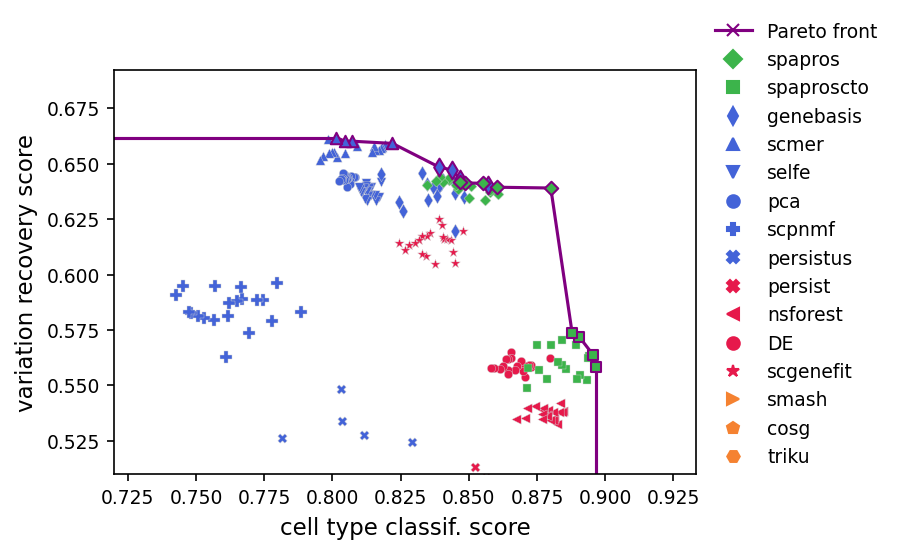

In [22]:
limits = {
    "Litvinukova2020_w_cts": {50: [0.27, 0.43], 150: [0.38, 0.54]},
    "Madissoon2019_w_cts": {50: [0.53, 0.45], 150: [0.72, 0.51]},
}

for dataset in DATASETS:
    for n in [50,150]:
        df_ = pareto_front(df.loc[(df["n"] == n) & (df["dataset"] == dataset)], col1="ct score", col2="var score")
        plot_pareto_front(
            df_, col1="ct score", col2="var score", 
            save=f"./figures/pareto_front_{dataset}_{n}_{EVAL_BATCH}_{SELECT_BATCH[0]}.pdf"
        )
        plot_pareto_front(
            df_, col1="ct score", col2="var score",
            xmin=limits[dataset][n][0], ymin=limits[dataset][n][1], 
            save=f"./figures/pareto_front_{dataset}_{n}_{EVAL_BATCH}_{SELECT_BATCH[0]}_zoom.pdf"
        )